<a href="https://colab.research.google.com/github/yongkgu/Computer_Vision/blob/main/Image_Classification(Fashion_MNIST%2C_CIFAR_10)_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


## Image **Classification** 

(24000, 28, 28) (4000, 28, 28)
(24000,) (4000,)
[2 2 0 ... 2 3 0] [0 0 0 ... 0 3 0]


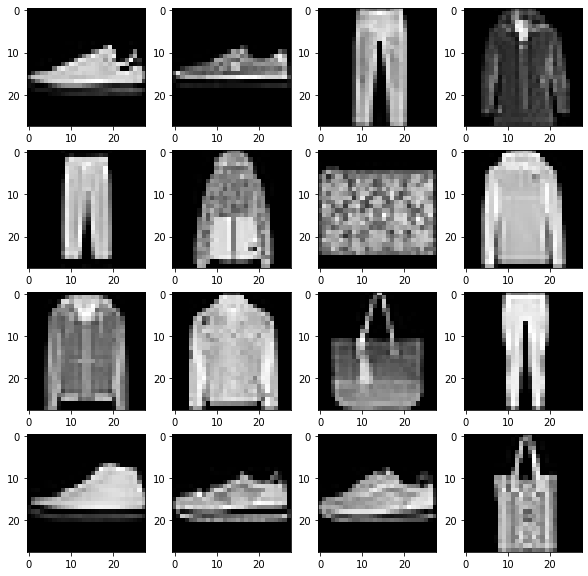

[2 2 0 1 0 1 3 1 1 1 3 0 2 2 2 3]


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout,Input

# Load fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X,train_Y), (test_X, test_Y) = fashion_mnist.load_data()

# Normalize intensities between 0 and 1
train_X = train_X / 255.0
test_X = test_X / 255.0

# 읽기 전용 해제
train_Y = train_Y.copy()
test_Y = test_Y.copy()

# 데이터 셋 수정 (1,4,7,8 -> 0,1,2,3)
idx = []
for i in range(60000):
  if train_Y[i] == 1 or train_Y[i] == 4 or train_Y[i] == 7 or train_Y[i] == 8:
    if train_Y[i] == 1:
      train_Y[i] = 0
    elif train_Y[i] == 4:
      train_Y[i] = 1
    elif train_Y[i] == 7:
      train_Y[i] = 2
    elif train_Y[i] == 8:
      train_Y[i] = 3    
    idx.append(i)

train_Y = train_Y[idx]
train_X = train_X[idx,:,:]

idx2 = []
for i in range(10000):
  if test_Y[i] == 1 or test_Y[i] == 4 or test_Y[i] == 7 or test_Y[i] == 8:
    if test_Y[i] == 1:
      test_Y[i] = 0
    elif test_Y[i] == 4:
      test_Y[i] = 1
    elif test_Y[i] == 7:
      test_Y[i] = 2
    elif test_Y[i] == 8:
      test_Y[i] = 3 
    idx2.append(i)

test_Y = test_Y[idx2]
test_X = test_X[idx2,:,:]

# Check dataset
print(train_X.shape, test_X.shape)
print(train_Y.shape, test_Y.shape)
print(train_Y, test_Y)

# Display
plt.figure(figsize=(10, 10))
for c in range(16):
  plt.subplot(4,4,c+1)
  plt.imshow(train_X[c].reshape(28,28), cmap='gray')
plt.show()
print(train_Y[:16])


In [ ]:
def build_model():
  model = Sequential()

  input = Input(shape = (28,28,1))
  output = Conv2D(filters=32, kernel_size=(3,3))(input)
  output = Conv2D(filters=64, kernel_size=(3,3))(output)
  output = Conv2D(filters=64, kernel_size=(3,3))(output)
  output = Flatten()(output)
  output = Dense(units=128,activation='relu')(output)
  output = Dense(units=64,activation='relu')(output)
  output = Dense(units=4,activation='softmax')(output)

  model = Model(inputs = [input], outputs=output)

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics =['accuracy'])
  
  return model

model_ = build_model()
model_.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_14 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 22, 22, 64)        36928     
                                                                 
 flatten_5 (Flatten)         (None, 30976)             0         
                                                                 
 dense_13 (Dense)            (None, 128)               3965056   
                                                                 
 dense_14 (Dense)            (None, 64)                8256

In [ ]:
hist = model_.fit(train_X,train_Y,
                  epochs=25,
                  validation_split=0.3,
                  batch_size=128)

Epoch 1/25
132/132 [==============================] - 4s 29ms/step - loss: 8.9316e-05 - accuracy: 1.0000 - val_loss: 0.1194 - val_accuracy: 0.9893
Epoch 2/25
132/132 [==============================] - 4s 27ms/step - loss: 7.4243e-05 - accuracy: 1.0000 - val_loss: 0.1204 - val_accuracy: 0.9896
Epoch 3/25
132/132 [==============================] - 4s 27ms/step - loss: 6.3468e-05 - accuracy: 1.0000 - val_loss: 0.1213 - val_accuracy: 0.9896
Epoch 4/25
132/132 [==============================] - 4s 27ms/step - loss: 5.5086e-05 - accuracy: 1.0000 - val_loss: 0.1220 - val_accuracy: 0.9896
Epoch 5/25
132/132 [==============================] - 4s 27ms/step - loss: 4.7905e-05 - accuracy: 1.0000 - val_loss: 0.1228 - val_accuracy: 0.9894
Epoch 6/25
132/132 [==============================] - 4s 27ms/step - loss: 4.2496e-05 - accuracy: 1.0000 - val_loss: 0.1235 - val_accuracy: 0.9896
Epoch 7/25
132/132 [==============================] - 4s 28ms/step - loss: 3.8168e-05 - accuracy: 1.0000 - val_loss: 0

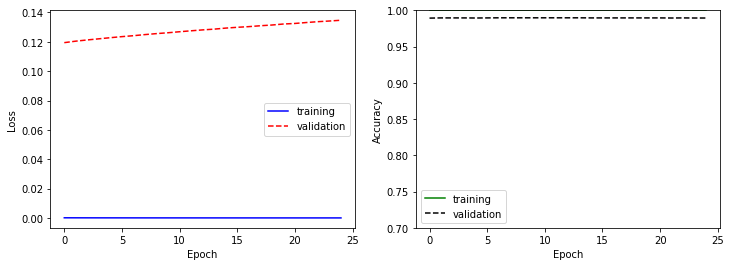

In [ ]:
# Show training history
plt.figure(figsize=(12, 4)), plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], 'b-', label='training')
plt.plot(hist.history['val_loss'], 'r--', label='validation')
plt.xlabel('Epoch'), plt.ylabel('Loss'), plt.legend()
plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'], 'g-', label='training')
plt.plot(hist.history['val_accuracy'], 'k--', label='validation')
plt.xlabel('Epoch'), plt.ylabel('Accuracy'), plt.ylim(0.7, 1), plt.legend()
plt.show()


In [ ]:
# Evaluate the model using the test dataset
model_.evaluate(test_X, test_Y, verbose=False)


[0.11112923175096512, 0.9894999861717224]

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4]


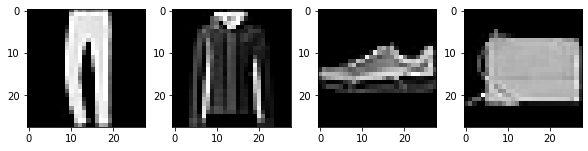

[[1.0000000e+00 4.3012506e-27 0.0000000e+00 0.0000000e+00]] 0
[[2.6382775e-06 9.9999738e-01 1.5705626e-27 2.1142438e-10]] 1
[[4.4662620e-37 7.1640595e-25 1.0000000e+00 1.1917444e-24]] 2
[[2.7095304e-25 8.1581849e-23 2.1572203e-25 1.0000000e+00]] 3


In [ ]:
# Evaluate a single image
(train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.fashion_mnist.load_data()
print(test_Y[:26])

img_trouser = test_X[2]
img_coat = test_X[6]
img_sneaker = test_X[9]
img_bag = test_X[18]

arr = [img_trouser,img_coat,img_sneaker,img_bag]

i=0
plt.figure(figsize=(10, 10))
for img in arr:
  plt.subplot(4,4,i+1)
  i = i+1
  plt.imshow(img.reshape(28,28), cmap='gray')
plt.show()

for img in arr:
  pre_img = tf.expand_dims(img, axis=0)
  pre_img = pre_img/255
  pred = model_.predict(pre_img)
  print(pred,np.argmax(pred))

# **Image Classification (Lenet-5)**

(24000, 28, 28) (4000, 28, 28)
(24000,) (4000,)
[2 2 0 ... 2 3 0] [0 0 0 ... 0 3 0]


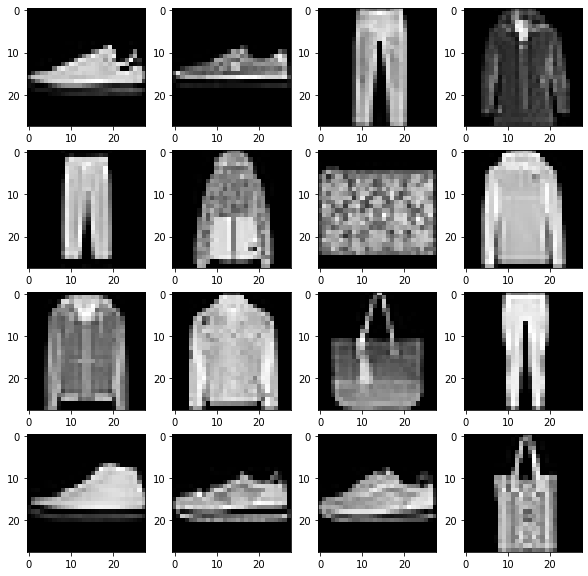

[2 2 0 1 0 1 3 1 1 1 3 0 2 2 2 3]


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout,Input,Activation,Softmax

# Load fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X,train_Y),(test_X,test_Y) = fashion_mnist.load_data()

# Normalize intensities between 0 and 1
train_X = train_X / 255.0
test_X = test_X / 255.0

# 읽기 전용 해제
train_Y = train_Y.copy()
test_Y = test_Y.copy()

# 데이터 셋 수정 (1,4,7,8 -> 0,1,2,3)
idx = []
for i in range(60000):
  if train_Y[i] == 1 or train_Y[i] == 4 or train_Y[i] == 7 or train_Y[i] == 8:
    if train_Y[i] == 1:
      train_Y[i] = 0
    elif train_Y[i] == 4:
      train_Y[i] = 1
    elif train_Y[i] == 7:
      train_Y[i] = 2
    elif train_Y[i] == 8:
      train_Y[i] = 3    
    idx.append(i)

train_Y = train_Y[idx]
train_X = train_X[idx,:,:]

idx2 = []
for i in range(10000):
  if test_Y[i] == 1 or test_Y[i] == 4 or test_Y[i] == 7 or test_Y[i] == 8:
    if test_Y[i] == 1:
      test_Y[i] = 0
    elif test_Y[i] == 4:
      test_Y[i] = 1
    elif test_Y[i] == 7:
      test_Y[i] = 2
    elif test_Y[i] == 8:
      test_Y[i] = 3 
    idx2.append(i)

test_Y = test_Y[idx2]
test_X = test_X[idx2,:,:]

# Check dataset
print(train_X.shape, test_X.shape)
print(train_Y.shape, test_Y.shape)
print(train_Y, test_Y)

# Display
plt.figure(figsize=(10, 10))
for c in range(16):
  plt.subplot(4,4,c+1)
  plt.imshow(train_X[c].reshape(28,28), cmap='gray')
plt.show()
print(train_Y[:16])


In [ ]:
def build_model(): #Lenet-5 model
  model = Sequential([Conv2D(input_shape=(28,28,1),kernel_size=(5,5),
                      strides=(1,1),padding='same',activation='relu',filters=20),
                      MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'),
                      Conv2D(kernel_size=(5,5),
                      strides=(1,1),padding='same',activation='relu',filters=50),
                      MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'),
                      Flatten(),
                      Dense(units=500),
                      Activation('relu'),
                      Dense(units=4),
                      Softmax()
                      ])

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics =['acc'])
  
  return model

model_lenet = build_model()
model_lenet.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 20)        520       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 20)       0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 14, 50)        25050     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 50)         0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 2450)              0         
                                                                 
 dense_16 (Dense)            (None, 500)              

In [ ]:
# Train model
hist_ = model_lenet.fit(train_X,train_Y,
                  epochs=25,
                  validation_split=0.3,
                  batch_size=128)

Epoch 1/25
132/132 [==============================] - 3s 15ms/step - loss: 0.1116 - acc: 0.9637 - val_loss: 0.0392 - val_acc: 0.9869
Epoch 2/25
132/132 [==============================] - 2s 13ms/step - loss: 0.0355 - acc: 0.9897 - val_loss: 0.0278 - val_acc: 0.9904
Epoch 3/25
132/132 [==============================] - 2s 13ms/step - loss: 0.0231 - acc: 0.9924 - val_loss: 0.0245 - val_acc: 0.9926
Epoch 4/25
132/132 [==============================] - 2s 13ms/step - loss: 0.0192 - acc: 0.9941 - val_loss: 0.0244 - val_acc: 0.9925
Epoch 5/25
132/132 [==============================] - 2s 13ms/step - loss: 0.0121 - acc: 0.9961 - val_loss: 0.0233 - val_acc: 0.9932
Epoch 6/25
132/132 [==============================] - 2s 13ms/step - loss: 0.0111 - acc: 0.9964 - val_loss: 0.0228 - val_acc: 0.9924
Epoch 7/25
132/132 [==============================] - 2s 13ms/step - loss: 0.0067 - acc: 0.9980 - val_loss: 0.0249 - val_acc: 0.9924
Epoch 8/25
132/132 [==============================] - 2s 13ms/step - 

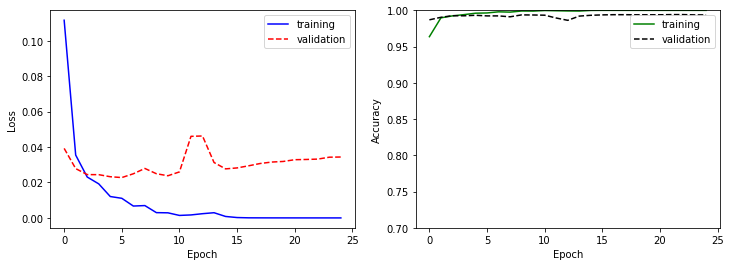

In [ ]:
# Show training history
plt.figure(figsize=(12, 4)), plt.subplot(1, 2, 1)
plt.plot(hist_.history['loss'], 'b-', label='training')
plt.plot(hist_.history['val_loss'], 'r--', label='validation')
plt.xlabel('Epoch'), plt.ylabel('Loss'), plt.legend()
plt.subplot(1, 2, 2)
plt.plot(hist_.history['acc'], 'g-', label='training')
plt.plot(hist_.history['val_acc'], 'k--', label='validation')
plt.xlabel('Epoch'), plt.ylabel('Accuracy'), plt.ylim(0.7, 1), plt.legend()
plt.show()

In [ ]:
# Evaluate the model using the test dataset
model_lenet.evaluate(test_X, test_Y, verbose=False)

[0.03504906967282295, 0.9937499761581421]

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4]


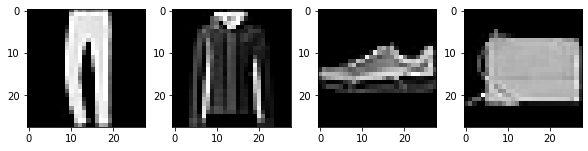

[[1.0000000e+00 4.3012506e-27 0.0000000e+00 0.0000000e+00]] 0
[[2.6382775e-06 9.9999738e-01 1.5705626e-27 2.1142438e-10]] 1
[[4.4662620e-37 7.1640595e-25 1.0000000e+00 1.1917444e-24]] 2
[[2.7095304e-25 8.1581849e-23 2.1572203e-25 1.0000000e+00]] 3


In [ ]:
# Evaluate a single image
(train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.fashion_mnist.load_data()
print(test_Y[:26])

img_trouser = test_X[2]
img_coat = test_X[6]
img_sneaker = test_X[9]
img_bag = test_X[18]

arr = [img_trouser,img_coat,img_sneaker,img_bag]

i=0
plt.figure(figsize=(10, 10))
for img in arr:
  plt.subplot(4,4,i+1)
  i = i+1
  plt.imshow(img.reshape(28,28), cmap='gray')
plt.show()

for img in arr:
  pre_img = tf.expand_dims(img, axis=0)
  pre_img = pre_img/255
  pred = model_.predict(pre_img)
  print(pred,np.argmax(pred))



# **Transfer learning (CIFAR-10 Dataset)**



In [ ]:
import tensorflow as tf
import numpy as np
from google.colab.patches import cv_imshow
import matplotlib.pyplot as plt

# Load CIFAR-10 Dataset
(train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.cifar10.load_data()
print(train_X.shape, test_X.shape)

# 읽기 전용 해제
train_Y = train_Y.copy()
test_Y = test_Y.copy()

# 데이터 셋 수정 (1,4,7,8 -> 0,1,2,3)
idx = []
for i in range(50000):
  if train_Y[i] == 0 or train_Y[i] == 1 or train_Y[i] == 8:
    if train_Y[i] == 8:
      train_Y[i] = 2    
    idx.append(i)

train_Y = train_Y[idx]
train_X = train_X[idx,:,:]

idx2 = []
for i in range(10000):
  if test_Y[i] == 0 or test_Y[i] == 1 or test_Y[i] == 8:
    if test_Y[i] == 8:
      test_Y[i] = 2
    idx2.append(i)

test_Y = test_Y[idx2]
test_X = test_X[idx2,:,:]

# Check dataset
print(train_X.shape, test_X.shape)
print(train_Y.shape, test_Y.shape)
print(train_Y[:16])


(50000, 32, 32, 3) (10000, 32, 32, 3)
(15000, 32, 32, 3) (3000, 32, 32, 3)
(15000, 1) (3000, 1)
[[1]
 [1]
 [2]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [2]
 [1]
 [1]]


In [ ]:
# Preprocessing
train_X = tf.keras.applications.vgg16.preprocess_input(train_X)
test_X = tf.keras.applications.vgg16.preprocess_input(test_X)

# Load VGG16
model = tf.keras.applications.VGG16()
model.summary()

# Load VGG16 with include_top=False
model = tf.keras.applications.VGG16(include_top=False)
model.summary()

# Build a new model using VGG16 (Functional API)
base_model = tf.keras.applications.VGG16(input_shape=[32,32,3],
include_top=False, weights='imagenet')
x = base_model.output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
predictions = tf.keras.layers.Dense(3, activation='softmax')(x)
model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

model.summary()

# Freeze pretrained layers
for layer in model.layers[:19]:
  layer.trainable = False
for layer in model.layers[19:]:
  layer.trainable = True
model.summary()

# Train model
model.compile(optimizer=tf.keras.optimizers.Adam(),
loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_X, train_Y, batch_size=36, epochs=10, validation_split=0.25)

553476096/553467096 [==============================] - 9s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

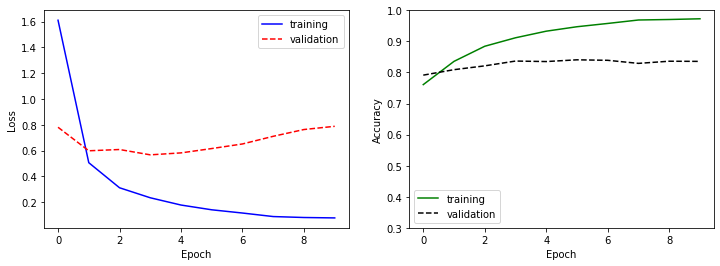

In [ ]:
# Show training history
plt.figure(figsize=(12, 4)), plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='training')
plt.plot(history.history['val_loss'], 'r--', label='validation')
plt.xlabel('Epoch'), plt.ylabel('Loss'), plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='training')
plt.plot(history.history['val_accuracy'], 'k--', label='validation')
plt.xlabel('Epoch'), plt.ylabel('Accuracy'), plt.ylim(0.3, 1), plt.legend()
plt.show()

In [ ]:
# Evaluate the model using the test dataset
model.evaluate(test_X, test_Y, verbose=False)


[0.7575015425682068, 0.8376666903495789]